In [1]:
#authenticate with the python API
from arcgis.gis import GIS
from getpass import getpass

gis = GIS("https://www.arcgis.com", "astrong_pnw", getpass())
print(gis)

········
GIS @ https://pnw.maps.arcgis.com


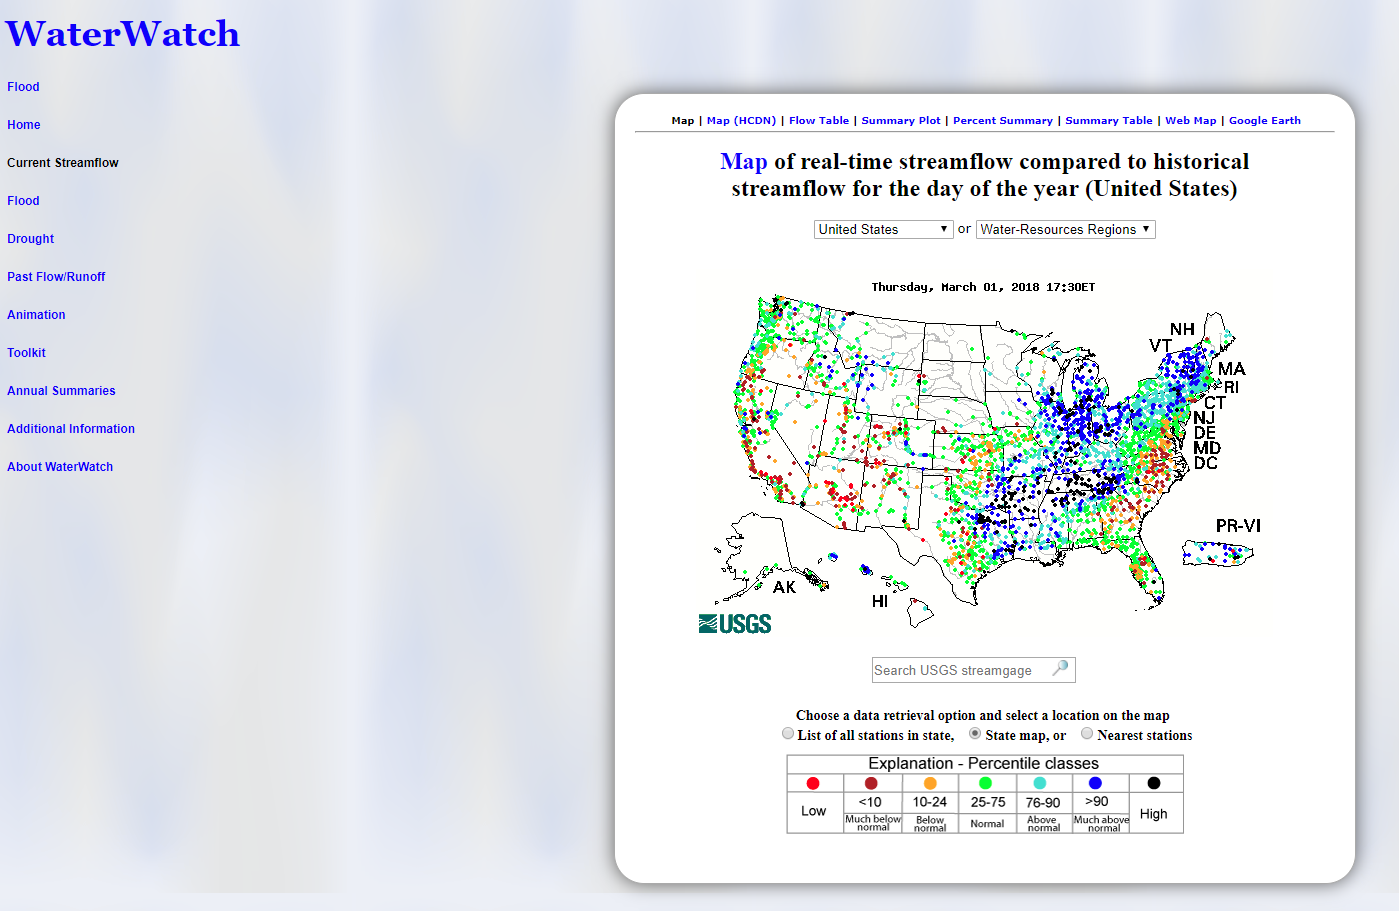

In [3]:
#Sometimes you come across a site with great data, but not so great accessibility 
from IPython.display import Image
Image("usgs_pic.png")

In [2]:
#After a much too long search... you've found the download url. How do you keep your ArcGIS Services up 
#to date with real time data provided through static URLs? With Pyhton, of course. 

#download the file to your computer with requests (source data: https://waterwatch.usgs.gov/index.php?id=ww_currents)
import requests

shp_url = "https://waterwatch.usgs.gov/download/?gt=covshp&mt=real&ofmt=zip&mk=1"

r = requests.get(shp_url)
open('gauge_data.zip', 'wb').write(r.content)
print("Download success")

Download success


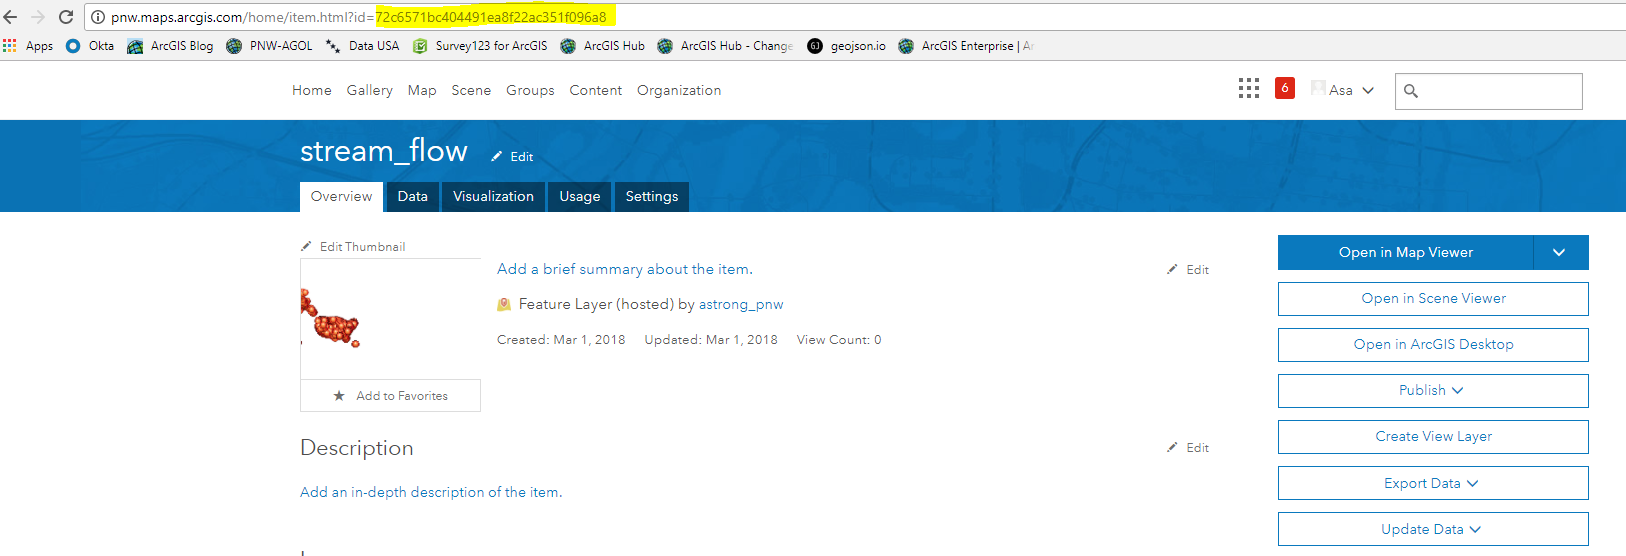

In [19]:
#We've now downloaded the most recent real-time streamflow gauges from USGS. Now we need to use the Python API
#to update our feature service in ArcGIS Online. You can uniquely identify any item in your ArcGIS Content using by 
#capturing its item id
Image("item_id.PNG")

<Item title:"stream_flow" type:Feature Layer Collection owner:astrong_pnw>
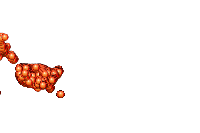

In [3]:
#Let's use the API to access the stream_flow item by passing in its unique item id
streamflow_item = gis.content.get('72c6571bc404491ea8f22ac351f096a8')
streamflow_item

In [4]:
#Lets take a look at the data in a web map. Red dots represent low flow areas, yellow represent normal flow areas, and blue 
#represent high flow areas
web_map = gis.content.get('df7d86d383eb40bc9e9dbde59acbec5a')
gis.map(web_map)

In [5]:
#Now lets overwrite this item with the new data we downloaded from USGS
from arcgis.features import FeatureLayerCollection

feature_collection = FeatureLayerCollection.fromitem(streamflow_item)
data = 'gauge_data.zip'
feature_collection.manager.overwrite(data)

{'success': True}

In [6]:
#reprint item and print modification date
from datetime import datetime

streamflow_item = gis.content.get('72c6571bc404491ea8f22ac351f096a8')
print(datetime.fromtimestamp(streamflow_item.modified/1000))

2018-03-17 12:23:10


In [7]:
#Now let's look at the map one more time and look for changes in the flow patterns
gis.map(web_map)